# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

#sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.
dataframe.head(1)

,normal,binomial
0,21.986857,18


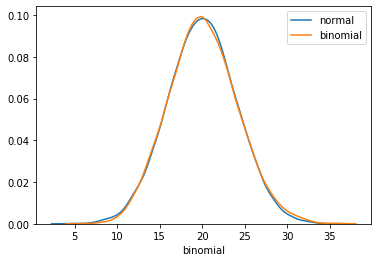

In [5]:
sns.distplot(dataframe['normal'], hist= False, label = "normal")
sns.distplot(dataframe['binomial'], hist = False, label = "binomial");

In [6]:
# Questão 1
q_norm = dataframe["normal"].quantile((0.25, 0.5, 0.75))
q_binom = dataframe["binomial"].quantile((0.25, 0.5, 0.75))
resposta1 = tuple(round(q_norm - q_binom, 3))

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [7]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return resposta1
    pass

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [8]:
def q2():
    # Retorne aqui o resultado da questão 2.
    #media e desvio padra(std) da variavel normal e ECDF
    media_norm = dataframe["normal"].mean()
    std_norm = dataframe["normal"].std()
    ecdf = ECDF(dataframe["normal"])
    return float(round((ecdf((media_norm + std_norm)) - ecdf((media_norm - std_norm))), 3))
    pass

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [9]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return (round((dataframe["binomial"].mean() - dataframe['normal'].mean()),3), 
            round(dataframe["binomial"].var() - dataframe['normal'].var(), 3))
    pass

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [10]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [11]:
# Sua análise da parte 2 começa aqui.
stars.head(1)

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.88243,0.465318,-0.515088,1.677258,14.860146,10.576487,127.39358,False


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [12]:
def q4():
    # Retorne aqui o resultado da questão 4.
    # Filtrando os valores:
    filter_stars = stars.loc[stars['target'] == False]['mean_profile']

    # sct.zscore função de padronização
    false_pulsar_mean_profile_standardized = sct.zscore(filter_stars)

    # Quantis teóricos:
    quantis = sct.norm.ppf([.80, .90, .95])

    # CDF Empírica padronização:
    ecdf = ECDF(false_pulsar_mean_profile_standardized)

    return tuple(np.around(ecdf(quantis), 3))
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [13]:
def q5():
    # Retorne aqui o resultado da questão 5.
    filter_stars = stars.loc[stars['target'] == False]['mean_profile']

    false_pulsar_mean_profile_standardized = sct.zscore(filter_stars)
    
    # Quantis
    quantis = np.quantile(false_pulsar_mean_profile_standardized,[0.25,0.5,0.75])

    # Quantis normal:
    quant_norm = sct.norm.ppf([0.25, 0.5, 0.75])

    return tuple(np.around((quantis - quant_norm), 3))
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.